### Problem definition:
> The problem description is to predict the optimum number of
clusters from the given dataset and to visualize it. 
### Data Set:
> download from https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [1]:
## Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

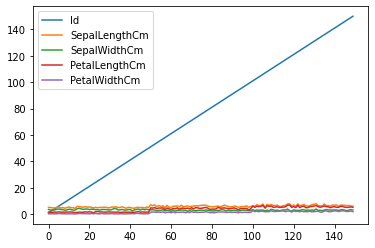

In [4]:
iris.plot();

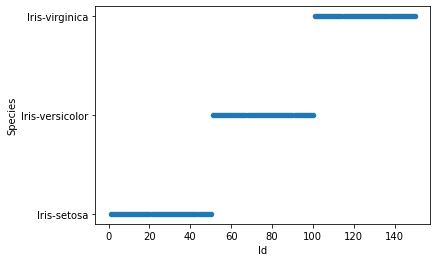

In [5]:
iris.plot.scatter(x="Id",y="Species");

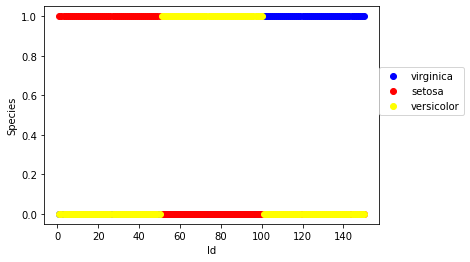

In [6]:
fig, ax = plt.subplots()
x = iris["Id"]
ax.scatter(x, iris["Species"]=="Iris-virginica", c='blue', label="virginica")
ax.scatter(x, iris["Species"]=="Iris-setosa", c='red', label="setosa")
ax.scatter(x, iris["Species"]=="Iris-versicolor", c='yellow', label="versicolor")
ax.set_xlabel("Id")
ax.set_ylabel("Species")
ax.legend(loc=(1, 0.5));

In [7]:
iris_modified = iris.drop("Species",axis=1)
iris_modified.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [8]:
x = iris_modified.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

One of the popular way to find the optimum k value is using `elbow method`

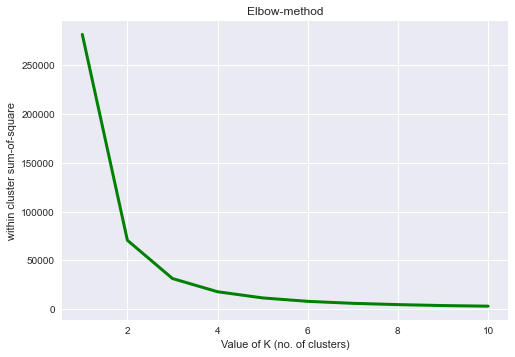

In [9]:
plt.style.use("seaborn")
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500,random_state=0) 
    KM.fit(x)
    cost.append(KM.inertia_)      

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K (no. of clusters)") 
plt.ylabel("within cluster sum-of-square") 
plt.title("Elbow-method")
plt.show() 

it is clear from the plot that `k=3` is the optimum value for KMeans

In [10]:
# Apply kmeans to the dataset
km = KMeans(n_clusters = 3, max_iter=500,random_state=0)
y_kmeans = km.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

0 - virginicia
1 - setosa
2 - versicolour

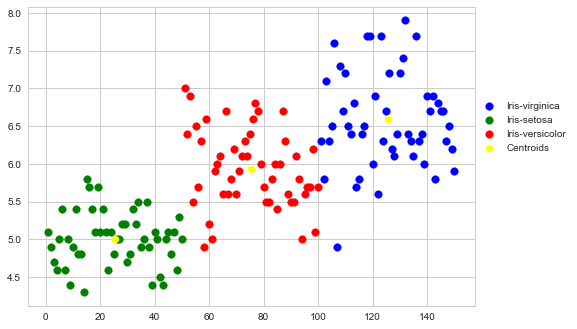

In [11]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots()
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=60, c='blue', label="Iris-virginica")
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=60, c='green', label="Iris-setosa")
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=60, c='red', label="Iris-versicolor")
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='yellow',label="Centroids")
ax.legend(loc=(1, 0.5));